In [1]:
# load model
%load_ext autoreload
%autoreload 2

model_filepath='hog_svm_daimler_model.pkl'
from sklearn.externals import joblib
model=joblib.load(model_filepath)


/home/facuq/dev/sld/.env/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


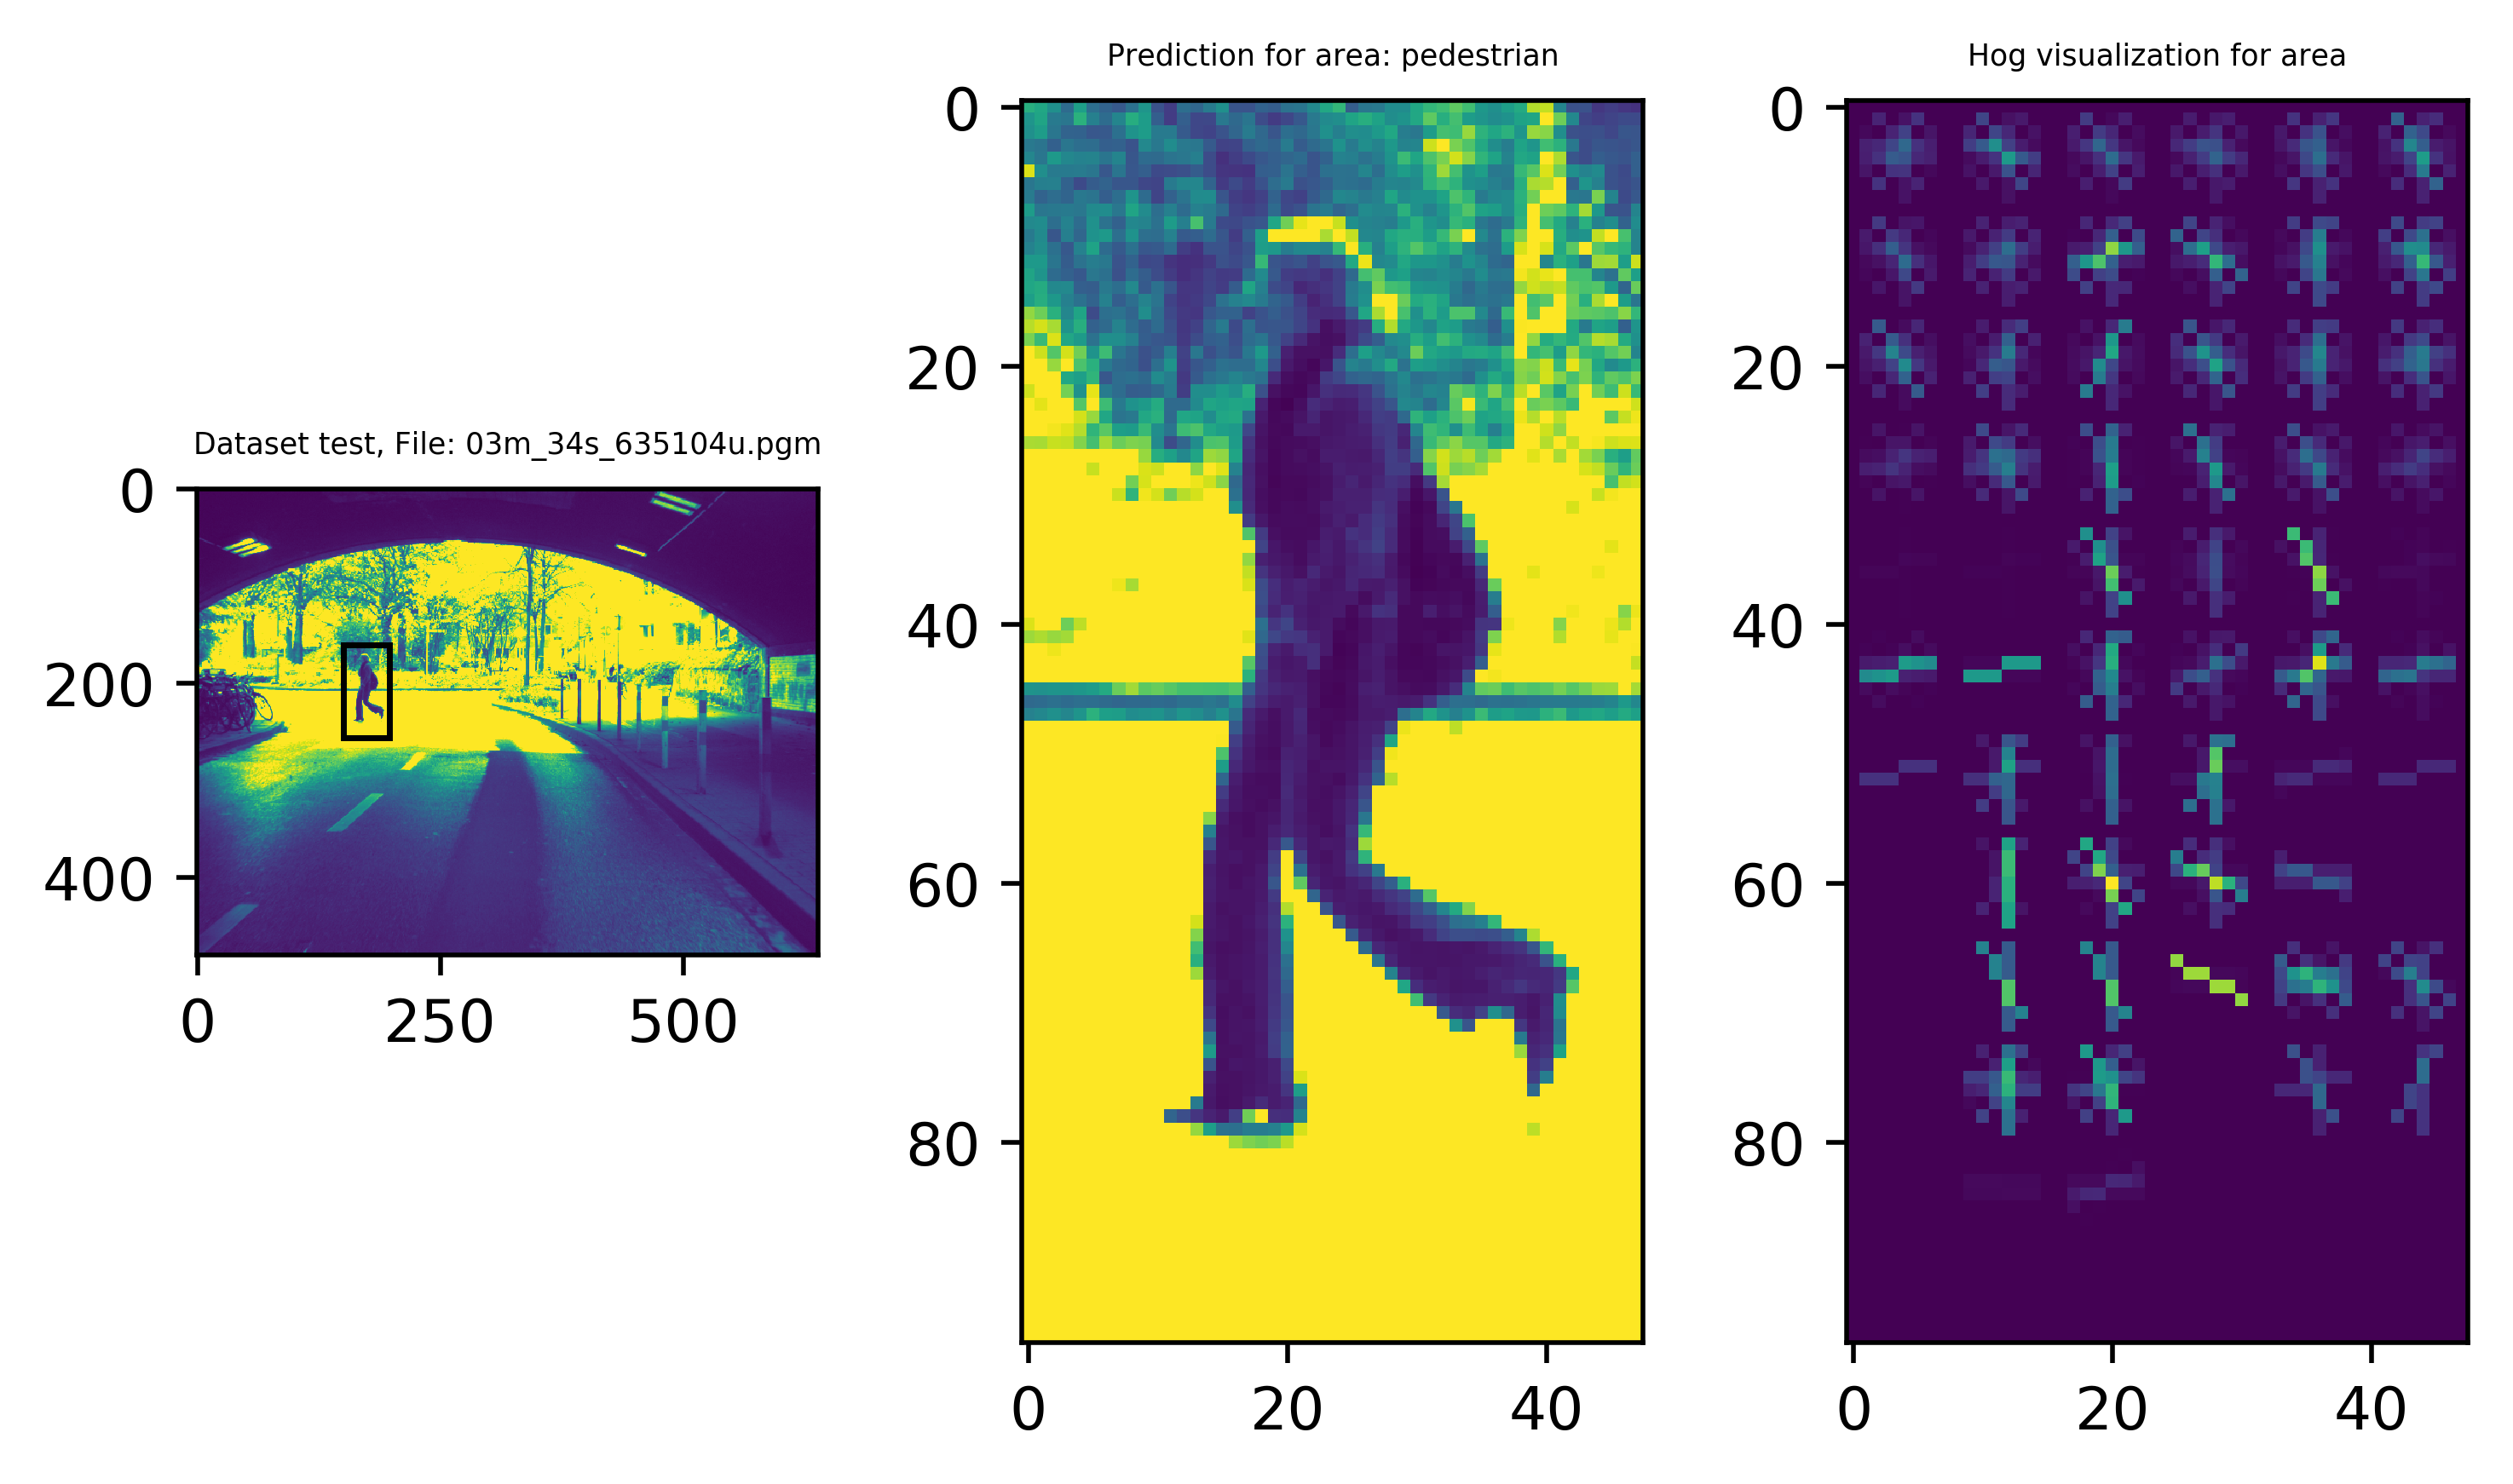

In [7]:
# test with a new positive image
import os
import skimage.io as io
import matplotlib.pyplot as plt
import experiment
import skimage
import matplotlib.patches as patches
basepaths={"pedestrian":"/media/data/datasets/pedestrian/daimler_mono/DaimlerBenchmark/Data/TrainingData/Pedestrians/48x96",
           "non_pedestrian":"/media/data/datasets/pedestrian/daimler_mono/DaimlerBenchmark/Data/TrainingData/NonPedestrians",
           "test":"/media/data/datasets/pedestrian/daimler_mono/DaimlerBenchmark/Data/TestData",}



hog_image_size=(96,48)
## Choose dataset and image index to predict
dataset="test"
index=3006 
# Also pick x,y,w,h position of bounding box to predict if dataset="test" or dataset=="non_edestrian
row=160
col=150
w=48#48
h=96#96
##

images_basepath=basepaths[dataset]

image_names=os.listdir(images_basepath)
image_filename=image_names[index]
image_filepath=os.path.join(images_basepath,image_filename)
image=io.imread(image_filepath)

if dataset=="pedestrian":
    area=image
else:
    area=skimage.transform.resize(image[row:row+h,col:col+w],hog_image_size)
    

hog,hog_visualization=experiment.my_hog(area,visualise=True)
prediction=model.predict(hog.reshape(1,-1))

fig,(ax_image,ax_area,ax_hog)=plt.subplots(1,3,dpi=500)

ax_image.imshow(image)
ax_image.set_title("Dataset "+dataset+", File: "+image_filename,fontsize=5)

if dataset!="pedestrian":
    p = patches.Rectangle((col,row), w, h, fill=False)
    ax_image.add_patch(p)
    
ax_area.imshow(area)
pedestrian_labels={0:"non_pedestrian",1:"pedestrian"}
ax_area.set_title("Prediction for area: "+pedestrian_labels[prediction[0]],fontsize=5)
ax_hog.imshow(hog_visualization)
ax_hog.set_title("Hog visualization for area",fontsize=5)
plt.tight_layout()
plt.show()